# Lab | Random Forests

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
targets = pd.read_csv('./files_for_lab/target.csv')
categorical = pd.read_csv('./files_for_lab/categorical.csv')
numerical = pd.read_csv('./files_for_lab/numerical.csv')

In [3]:
print(targets.shape)
print(categorical.shape)
print(numerical.shape)

(95412, 2)
(95412, 22)
(95412, 315)


In [4]:
print(targets.isna().sum().sum())
print(categorical.isna().sum().sum())
print(numerical.isna().sum().sum())

0
0
0


In [5]:
# targets

In [6]:
# categorical

In [7]:
# numerical

Income, wealth1 and wealth2 are categories but can be treated with the scaler as numerical.

### Train-test split.

In [8]:
X = pd.concat([categorical, numerical], axis=1)

In [9]:
X.shape

(95412, 337)

In [10]:
y = targets.drop('TARGET_D', axis=1)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Oversampling.

In [12]:
df_train = pd.concat([X_train, y_train], axis=1)

In [13]:
df_train_1 = df_train[df_train['TARGET_B']==1]
df_train_0 = df_train[df_train['TARGET_B']==0]

In [14]:
print(len(df_train_1))
len(df_train_0)

3668


67891

In [15]:
from sklearn.utils import resample
df_train_1_ov = resample(df_train_1, replace=True, n_samples = len(df_train_0))

In [16]:
print(len(df_train_1_ov))
len(df_train_0)

67891


67891

In [17]:
df_train_ov = pd.concat([df_train_1_ov, df_train_0], axis=0).reset_index(drop=True)

In [18]:
X_train_ov = df_train_ov.drop('TARGET_B', axis=1)
y_train_ov = df_train_ov['TARGET_B']

In [19]:
X_train_ov.isna().sum().sum()

0

In [20]:
y_train_ov.isna().sum().sum()

0

### Encoding.

Train.

In [21]:
X_train_ov_num = X_train_ov.select_dtypes(exclude=object)
X_train_ov_cat = X_train_ov.select_dtypes(include=object)

In [22]:
# X_train_ov_num

In [23]:
# X_train_ov_cat

In [24]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', handle_unknown='ignore').fit(X_train_ov_cat)

In [25]:
X_train_cat_encoded = encoder.transform(X_train_ov_cat).toarray()

In [26]:
feature_names = encoder.get_feature_names_out(input_features=X_train_ov_cat.columns)

X_train_cat_enc = pd.DataFrame(X_train_cat_encoded, columns=feature_names)

In [27]:
# X_train_cat_enc

Test.

In [28]:
X_test_num = X_test.select_dtypes(exclude=object)
X_test_cat = X_test.select_dtypes(include=object)

In [29]:
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()

In [30]:
feature_names = encoder.get_feature_names_out(input_features=X_test_cat.columns)

X_test_cat_enc = pd.DataFrame(X_test_cat_encoded, columns=feature_names)

In [31]:
# X_test_cat_enc

### Scaling.

Train.

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [33]:
scaler.fit(X_train_ov_num)

MinMaxScaler()

In [34]:
X_train_num_sc = pd.DataFrame(scaler.transform(X_train_ov_num), columns=X_train_ov_num.columns)

In [35]:
# X_train_num_sc

Test.

In [36]:
X_test_num_sc = pd.DataFrame(scaler.transform(X_test_num), columns=X_test_num.columns)

In [37]:
# X_test_num_sc

### Concat.

In [38]:
X_train_tr = pd.concat([X_train_num_sc, X_train_cat_enc], axis=1)

In [39]:
X_train_tr.isna().sum().sum()

0

In [40]:
X_test_tr = pd.concat([X_test_num_sc, X_test_cat_enc], axis=1)

In [41]:
X_test_tr.isna().sum().sum()

0

In [42]:
df_train_tr = pd.concat([X_train_tr, y_train_ov], axis=1)

In [43]:
df_train_tr.isna().sum().sum()

0

In [44]:
y_test = y_test.reset_index(drop=True)

In [45]:
df_test_tr = pd.concat([X_test_tr, y_test], axis=1)

In [46]:
df_test_tr.isna().sum().sum()

0

### Random forest (1).

In [47]:
X_train = df_train_tr.drop('TARGET_B', axis=1)
y_train = df_train_tr['TARGET_B']

In [48]:
X_test = df_test_tr.drop('TARGET_B', axis=1)
y_test = df_test_tr['TARGET_B']

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(max_depth=5,
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8,
                             )
rf1.fit(X_train, y_train)
print(rf1.score(X_train, y_train))
print(rf1.score(X_test, y_test))

0.6225935691034158
0.6114534859346833


In [50]:
from sklearn.metrics import confusion_matrix
y_pred = rf1.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0    22678
1     1175
Name: TARGET_B, dtype: int64

array([[13939,  8739],
       [  529,   646]], dtype=int64)

In [51]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("precision: ",precision_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred))
print("f1: ",f1_score(y_test,y_pred))

precision:  0.06883324453915823
recall:  0.5497872340425531
f1:  0.12234848484848486


### Feature selection (variance).

In [52]:
from sklearn.feature_selection import VarianceThreshold
var_threshold = 0.02
sel = VarianceThreshold(threshold=(var_threshold))

sel = sel.fit(X_train)

sel.get_support()
var_list=list(sel.get_support())
droplist_var=[col[0] for col in zip(X_train.columns, var_list) if col[1] == False]
# print(droplist_var)
len(droplist_var)

240

In [53]:
X_train_2 = X_train.drop(droplist_var, axis=1)
X_test_2 = X_test.drop(droplist_var, axis=1)

In [54]:
# droplist = pd.DataFrame({'columns': droplist_var})
# droplist.to_csv('droplist_var.csv', index=False)

### Random forest (2).

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(max_depth=5,
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8,
                             )
rf2.fit(X_train_2, y_train)
print(rf2.score(X_train_2, y_train))
print(rf2.score(X_test_2, y_test))

0.6228807942142552
0.6080576866641513


In [56]:
from sklearn.metrics import confusion_matrix
y_pred_2 = rf2.predict(X_test_2)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred_2))

0    22678
1     1175
Name: TARGET_B, dtype: int64

array([[13870,  8808],
       [  541,   634]], dtype=int64)

In [57]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("precision: ",precision_score(y_test,y_pred_2))
print("recall: ",recall_score(y_test,y_pred_2))
print("f1: ",f1_score(y_test,y_pred_2))

precision:  0.06714679093412412
recall:  0.5395744680851063
f1:  0.11943110106433077


### Feature selection (Selectkbest).

In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
kbest = SelectKBest(chi2, k=10).fit(X_train_2, y_train)

In [59]:
df =pd.DataFrame(data = kbest.scores_, columns = ['score'])
df['Column'] = X_train_2.columns
# print(df.sort_values(by = ['score'], ascending = False))

In [60]:
cols = df.sort_values(by = ['score'], ascending = False).head(30)['Column']
type(cols)

pandas.core.series.Series

In [61]:
cols

88          RFA_2F
106       RFA_2A_G
104       RFA_2A_E
8      LASTDATE_YR
105       RFA_2A_F
39            HVP2
38            HVP1
40            HVP3
101     HOMEOWNR_U
43            HVP6
41            HVP4
3        ODATEW_YR
48             RP1
21            ETH2
9      LASTDATE_MM
85        CARDPROM
113     DOMAIN_A_U
49             RP2
29             HV2
28             HV1
93        STATE_IN
92        STATE_IL
5           DOB_MM
2         DOMAIN_B
42            HVP5
75             HC6
12          INCOME
111     DOMAIN_A_S
50             RP3
74             HC5
Name: Column, dtype: object

In [62]:
cols.to_csv('final_cols_2.csv', index=False)

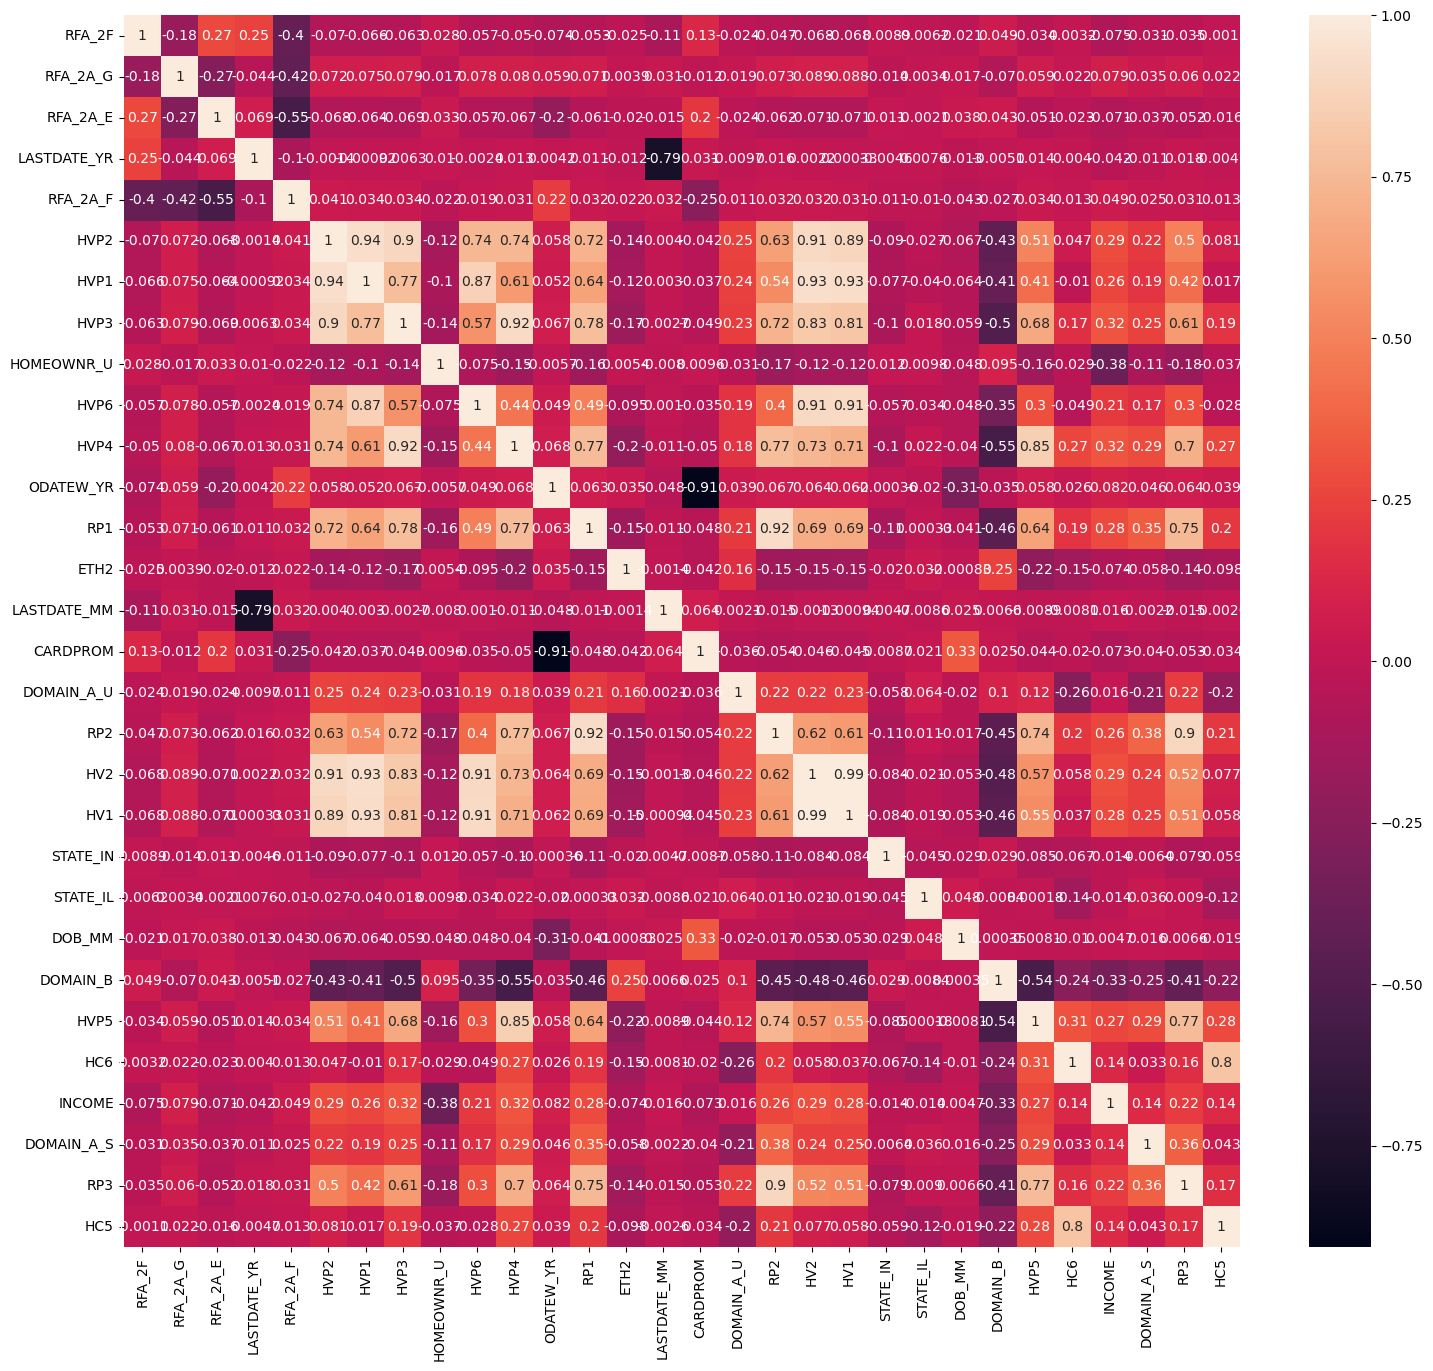

In [63]:
corr_matrix=X_train_2[cols].corr()
fig, ax = plt.subplots(figsize=(18,16))
ax = sns.heatmap(corr_matrix, annot=True)

In [64]:
X_train_3 = X_train_2[cols]
X_test_3 = X_test_2[cols]

### Random forest (3).

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf3 = RandomForestClassifier(max_depth=5,
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8,
                             )
rf3.fit(X_train_3, y_train)
print(rf3.score(X_train_3, y_train))
print(rf3.score(X_test_3, y_test))

0.610279713069479
0.6014337819142246


In [66]:
from sklearn.metrics import confusion_matrix
y_pred_3 = rf3.predict(X_test_3)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred_3))

0    22678
1     1175
Name: TARGET_B, dtype: int64

array([[13708,  8970],
       [  537,   638]], dtype=int64)

In [67]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("precision: ",precision_score(y_test,y_pred_3))
print("recall: ",recall_score(y_test,y_pred_3))
print("f1: ",f1_score(y_test,y_pred_3))

precision:  0.0664029975020816
recall:  0.5429787234042553
f1:  0.11833441528331635


Discuss the output and its impact in the business scenario. Is the cost of a false positive equals to the cost of the false negative? How would you change your algorithm or data in order to maximize the return of the business?

All three models offer a similar f1 score (which takes into acocunt both precision and recall). In this case, we are interested in both metrics, but particularly in recall, as we want to be able to identify as many actual donors as possible.

### Predicting with original data.

In [68]:
X = pd.concat([categorical, numerical], axis=1)

In [69]:
X.isna().sum().sum()

0

In [70]:
y = targets.drop('TARGET_D', axis=1)

In [71]:
y.isna().sum().sum()

0

In [72]:
X_cat = X.select_dtypes(include=object)
X_num = X.select_dtypes(exclude=object)

Encoding.

In [73]:
X_cat_encoded = encoder.transform(X_cat).toarray()
feature_names = encoder.get_feature_names_out(input_features=X_cat.columns)
X_cat_enc = pd.DataFrame(X_cat_encoded, index=X_cat.index, columns=feature_names)

Scaling.

In [74]:
X_num_sc = pd.DataFrame(scaler.transform(X_num), index=X_num.index, columns=X_num.columns)

Concat.

In [75]:
X_tr = pd.concat([X_num_sc, X_cat_enc], axis=1)
X_tr.isna().sum().sum()

0

In [76]:
df_tr = pd.concat([X_tr, y], axis=1)
df_tr.isna().sum().sum()

0

Dropping features.

In [77]:
X_tr = X_tr[cols]

In [78]:
y_pred_4 = rf3.predict(X_tr)
display(y.value_counts())
display(confusion_matrix(y, y_pred_4))

TARGET_B
0           90569
1            4843
dtype: int64

array([[54834, 35735],
       [ 1958,  2885]], dtype=int64)

In [79]:
print("precision: ",precision_score(y, y_pred_4))
print("recall: ",recall_score(y, y_pred_4))
print("f1: ",f1_score(y, y_pred_4))

precision:  0.07470222682547903
recall:  0.5957051414412554
f1:  0.1327565975657456


In [80]:
predB = pd.Series(y_pred_4)
predB.name = 'PRED_B'

Concat.

In [81]:
df_predB = pd.concat([X, y, predB, targets['TARGET_D']], axis=1)
df_predB.isna().sum().sum()

0

In [82]:
df_predB.to_csv('df_predB_2.csv')

In [83]:
df_tr_predB = pd.concat([X_tr, y, predB,  targets['TARGET_D']], axis=1)
df_tr_predB.isna().sum().sum()

0

In [84]:
# df_tr_predB

In [85]:
# df_tr_predB.to_csv('df_tr_predB.csv')